<a href="https://colab.research.google.com/github/Rahma2015/Stastical-Analysis-of-data-of-ML-project-I-did-to-get-insights/blob/main/Stastical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this notebook I do:

some statistical analysis on data I have.

The data is spectral data of tomatoes skanned  by spectoscanner and collected across 12 days.

Days are: 1,2,3,5,6,7,8,9,10,11,12,13 (total of 12 days ,day 4 not recorded)

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [ ]:
!pip install fitter

     |████████████████████████████████| 47 kB 3.7 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=9fb70ca1ba52049ce49afb51385b5974e9aeb43ef357f2deee81797926baf7fd
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=0950db8c75832b1a7b9c7451ddf98598014dc8940557a376232ceed364c18e42
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/CIE Si-Ware GP - drive /Datasets/Our_dataset/Small Tomatoes_7_3_2022/PSD_S"
files = os.listdir(path)

In [ ]:
def read_data(folder_path):
  files = os.listdir(folder_path)
  files = files[:-2]
  data={}
  c=0
  for filee in files:
    f = open(folder_path + '/' + filee, 'r')
    x = f.readlines()
    x = [x.split() for x in x][1:]
    x = np.array(x).T.tolist()
    index = [float(i) for i in x[0]] + ['day']
    x = [float(i) for i in x[1]]
    x.append(int(filee[2:4]))
    data[c]=x
    c+=1

  data_final=pd.DataFrame(data,index=index).T

  return data_final

In [ ]:
tomato = read_data(path)
tomato

,2543.4819310710036,2527.786295347872,2512.2831729859363,2496.969055305336,2481.840506901298,2466.8941864601425,2452.126810005941,2437.5351719991263,2423.116164881656,2408.866743124324,...,1383.644603743925,1378.9866499385419,1374.3599593732647,1369.7642078676763,1365.1990930609813,1360.6643061718448,1356.1595391283267,1351.6845084337874,1347.2389104762156,day
0,0.007901,0.008158,0.008324,0.008465,0.008634,0.008794,0.008891,0.008938,0.008994,0.009081,...,0.001772,0.001751,0.001730,0.001715,0.001684,0.001631,0.001582,0.001555,0.001526,1.0
1,0.005250,0.005278,0.005323,0.005446,0.005603,0.005722,0.005811,0.005898,0.005963,0.005973,...,0.001181,0.001114,0.001106,0.001150,0.001171,0.001136,0.001094,0.001093,0.001106,1.0
2,0.005806,0.005992,0.006089,0.006169,0.006283,0.006388,0.006439,0.006468,0.006523,0.006594,...,0.001308,0.001283,0.001259,0.001253,0.001247,0.001215,0.001167,0.001137,0.001138,1.0
3,0.007348,0.007516,0.007670,0.007854,0.008013,0.008064,0.008044,0.008083,0.008224,0.008376,...,0.001613,0.001598,0.001563,0.001518,0.001490,0.001484,0.001472,0.001436,0.001391,1.0
4,0.008120,0.008322,0.008415,0.008482,0.008583,0.008695,0.008786,0.008876,0.008972,0.009028,...,0.001711,0.001651,0.001588,0.001607,0.001672,0.001691,0.001649,0.001610,0.001600,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.006119,0.006409,0.006485,0.006421,0.006446,0.006637,0.006830,0.006871,0.006829,0.006874,...,0.001431,0.001391,0.001379,0.001408,0.001446,0.001454,0.001415,0.001352,0.001300,13.0
234,0.004798,0.004992,0.005155,0.005245,0.005290,0.005353,0.005461,0.005590,0.005699,0.005759,...,0.000980,0.000940,0.000960,0.001022,0.001055,0.001012,0.000940,0.000916,0.000947,13.0
235,0.006534,0.006748,0.006913,0.007025,0.007110,0.007173,0.007227,0.007318,0.007473,0.007635,...,0.001480,0.001456,0.001407,0.001351,0.001323,0.001317,0.001299,0.001263,0.001243,13.0
236,0.005847,0.006058,0.006202,0.006244,0.006237,0.006278,0.006414,0.006594,0.006726,0.006777,...,0.001372,0.001405,0.001396,0.001368,0.001339,0.001300,0.001250,0.001218,0.001218,13.0


In [ ]:
df_1 = tomato.iloc[:81,:]
df_2 = tomato.iloc[81:161,:]
df_3 = tomato.iloc[161:241,:]

In [ ]:
tomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Columns: 145 entries, 2543.4819310710036 to day
dtypes: float64(145)
memory usage: 271.5 KB


#Fitter library:

fitter package provides a simple class to identify the distribution from which
a data samples is generated from. It uses 80 distributions from Scipy and allows you to plot the results to check what is the most probable distribution and the best parameters.

fitter library documentation:
https://fitter.readthedocs.io/_/downloads/en/latest/pdf/

What are the distributions available ?

In [ ]:
from fitter import get_distributions
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm

In [ ]:
#common distrubution:
from fitter import get_common_distributions
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

#Important Note: It takes long time

In [ ]:
from fitter import Fitter
f = Fitter(df_1)
f.fit()


Now, without any knowledge about the distribution or its parameter, what is the distribution that fits the data best ? Scipy has 80 distributions and the Fitter class will scan all of them, call the fit function for you, ignoring those that fail or run forever and finally give you a summary of the best distributions in the sense of sum of the square errors. The best is to give an example:

,sumsquare_error,aic,bic,kl_div
halflogistic,3.978238,28787.176448,-93827.846827,inf
gompertz,20.800269,20371.799677,-74390.754630,inf
exponnorm,22.280423,24577.701028,-73583.374550,inf
expon,22.500084,24511.255289,-73477.519470,inf
genexpon,22.502970,24520.273712,-73447.899537,inf


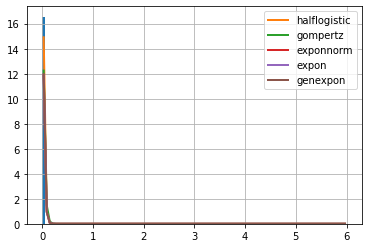

In [ ]:
f.summary()

In [ ]:
f.get_best(method='sumsquare_error')

{'halflogistic': {'loc': 0.0008918877972413004, 'scale': 0.020198082753732624}}

It founds it follows the most distribution it follow is:

Half-logostic distribution

https://en.wikipedia.org/wiki/Half-logistic_distribution

In [ ]:
#Second set of data (days)
f2 = Fitter(df_2)
f2.fit()


,sumsquare_error,aic,bic,kl_div
exponnorm,8.261776,17357.677122,-84038.525262,inf
expon,8.397722,17302.266412,-83858.560775,inf
genexpon,8.397750,17308.214853,-83830.446488,inf
genhalflogistic,8.788854,18523.262937,-83321.125269,inf
halflogistic,8.791795,18519.514731,-83326.604038,inf


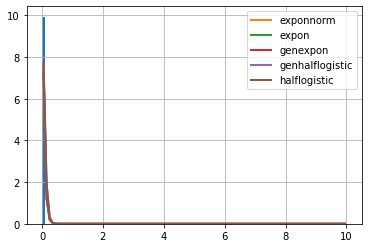

In [ ]:
f2.summary()

In [ ]:
f2.get_best(method='sumsquare_error')

{'exponnorm': {'K': 363.8781369867411,
  'loc': 0.0007634413885345716,
  'scale': 0.00015326672883591235}}

It founds it follows the most distribution it follow is:

An exponentially modified Normal continuous random variable 

Also known as the exponentially modified Gaussian distribution

With k equals to 363.8

In [ ]:
#Third set of data (days)
import time
t1=time.time()
f3 = Fitter(df_3)
f3.fit()
t2=time.time()
print('time for process is ', t2-t1)

time for process is  1018.0886523723602


In [ ]:
print('time consumed', (t2-t1)/60 , 'mins')

time consumed 16.968144206206002 mins


,sumsquare_error,aic,bic,kl_div
exponnorm,5.851045,15312.059159,-84311.542896,inf
expon,5.889778,15248.256698,-84247.195846,inf
halflogistic,8.737081,15758.195154,-79844.190838,inf
moyal,12.858665,15928.888286,-75529.569045,inf
frechet_l,15.187159,17370.092381,-73662.030815,inf


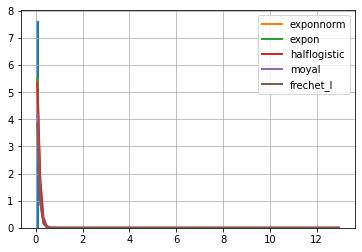

In [ ]:
f3.summary()

In [ ]:
f3.get_best(method='sumsquare_error')

{'exponnorm': {'K': 1946.044281796026,
  'loc': 0.0008096185547969757,
  'scale': 4.2262007185320626e-05}}

It founds it follows the most distribution it follow is:

An exponentially modified Normal continuous random variable 

Also known as the exponentially modified Gaussian distribution

With k equals to 1946

#Draw Histogram:

In [ ]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

I will draw histogram for just one feature (first wavelength) through first (the first 4 days),second and third sets of data.

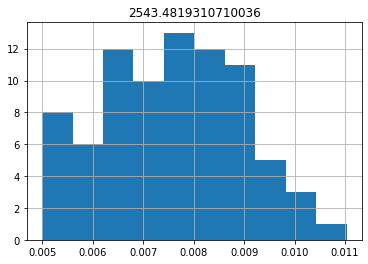

In [ ]:
#first 4 days histogram for first wavelength:
df_1.hist(column=2543.4819310710036);

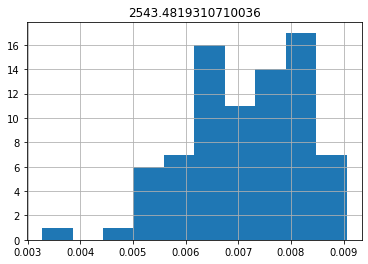

In [ ]:
#Second 4 days histogram for first wavelength:
df_2.hist(column=2543.4819310710036);

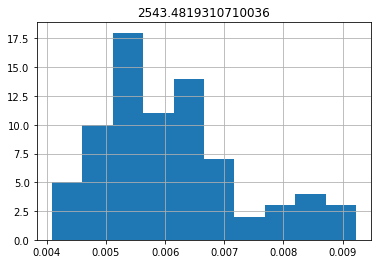

In [ ]:
#Third 4 days histogram for first wavelength:
df_3.hist(column=2543.4819310710036);

# Histograms for different 'days' within a given column 'first wavelength' in pandas.

So here I am drawing histogram for first coulmn 'first wavelength' across different days (target value)... we will notice change in histogram through different class/day.

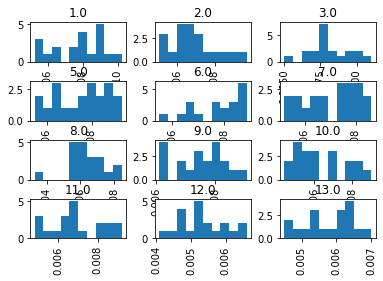

In [ ]:
tomato.hist(column=2543.4819310710036, by='day');

#matplotlib : I will plot the three columns/features (wavelengths) vs day 
for the first , second and third set of data (df_1,df_2,df_3) to check change happens in plotting accross days in different sets of data for the same features (just three wavelengths)

First set of data: day 1,2,3,5

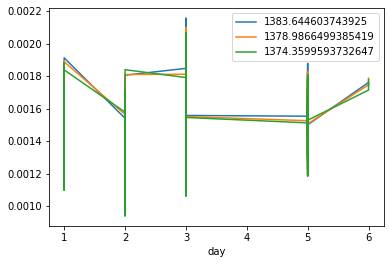

In [ ]:
import matplotlib.pyplot as plt
df_1.plot(x="day", y=[1383.644603743925, 1378.9866499385419,1374.3599593732647])
plt.show()

Second set of data: day 6,7,8,9

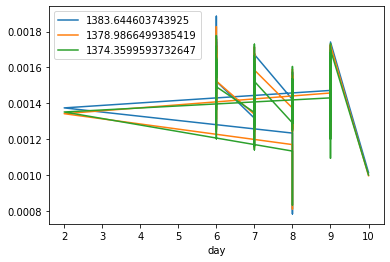

In [ ]:
import matplotlib.pyplot as plt
df_2.plot(x="day",  y=[1383.644603743925, 1378.9866499385419,1374.3599593732647])
plt.show()

Third set of data: day 10,11,12,13

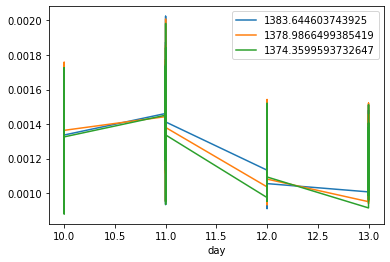

In [ ]:
import matplotlib.pyplot as plt
df_3.plot(x="day", y=[1383.644603743925, 1378.9866499385419,1374.3599593732647])
plt.show()

# I can't get clear insights from these above plots 